# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pre-processing

In [3]:
X = df.drop(["label"], axis=1)
y = df.label

## Splitting Data to Train and Test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Normalization

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

## One_Hot Encoding

In [6]:
# one_hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape, y_test.shape, x_train.shape, x_test.shape

((33600, 10), (8400, 10), (33600, 784), (8400, 784))

## Reshaping to 3D 

In [7]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

# Augmentation

In [8]:
datagen = ImageDataGenerator(
    rotation_range=45,      # Rotate images by a random angle within +/- 45 degrees
    width_shift_range=0.2,  # Shift images horizontally by a fraction of the total width
    height_shift_range=0.2, # Shift images vertically by a fraction of the total height
    shear_range=0.1,        # Apply shear transformations within +/- 10 degrees
    zoom_range=0.1,         # Zoom in/out on images by a factor of +/- 10%
    horizontal_flip=False,  # Do not flip images horizontally
    vertical_flip=False,    # Do not flip images vertically
    fill_mode='nearest'    
)

In [9]:
datagen.fit(x_train)
augmented_data = datagen.flow(x_train,y_train, batch_size=128, shuffle=False)
x_train_aug, y_train_aug = augmented_data.next()
x_train_final = np.concatenate((x_train, x_train_aug))
y_train_final = np.concatenate((y_train, y_train_aug))

In [10]:
class_num = y_train.shape[1]
class_num

10

# Building The Model

In [11]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(class_num, activation='softmax'))

model.build()

## Compiling The Model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                    

## Callbacks

In [13]:
reduce_lr = ReduceLROnPlateau(
    monitor = "val_accuracy", 
    patience = 2,
    verbose = 1, 
    factor = 0.5, 
    min_lr = 0.0000001
)

early_stopping = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    verbose = 1,
    mode = "max",
)

## Fitting The Model

In [14]:
history = model.fit(x_train_final, y_train_final, 
                    validation_data=(x_test, y_test), 
                    epochs=30, 
                    batch_size=128,
                    validation_steps = x_test.shape[0] // 128,
                    steps_per_epoch = x_train.shape[0] // 128,
                    callbacks = [reduce_lr, early_stopping])

Epoch 1/30


2023-07-12 19:42:15.317497: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


262/262 [==============================] - 15s 12ms/step - loss: 0.5339 - accuracy: 0.8344 - val_loss: 0.1971 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 2/30
262/262 [==============================] - 3s 12ms/step - loss: 0.1353 - accuracy: 0.9630 - val_loss: 0.0532 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 3/30
262/262 [==============================] - 3s 11ms/step - loss: 0.0991 - accuracy: 0.9732 - val_loss: 0.0393 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 4/30
262/262 [==============================] - 3s 11ms/step - loss: 0.0835 - accuracy: 0.9776 - val_loss: 0.0339 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 5/30
262/262 [==============================] - 3s 11ms/step - loss: 0.0732 - accuracy: 0.9798 - val_loss: 0.0416 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 6/30
262/262 [==============================] - 3s 11ms/step - loss: 0.0625 - accuracy: 0.9835 - val_loss: 0.0344 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 7/30
262/262 [==============================] - 3s 11ms/step - loss:

# Interpreting Result & Error Analysis

<Axes: >

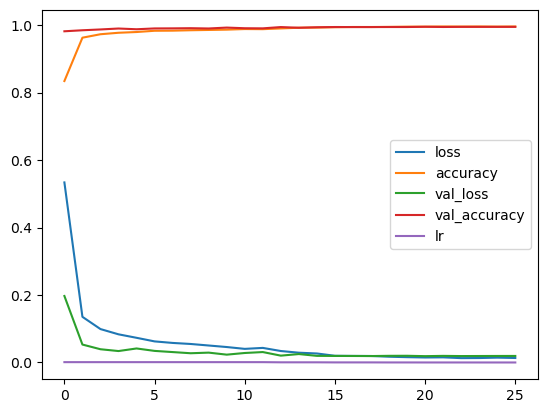

In [15]:
pd.DataFrame(history.history).plot()

# Predicting Test Data Frame

In [16]:
test_df = test_df.values.reshape(-1,28,28,1)
predictions = model.predict(test_df)

875/875 [==============================] - 2s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

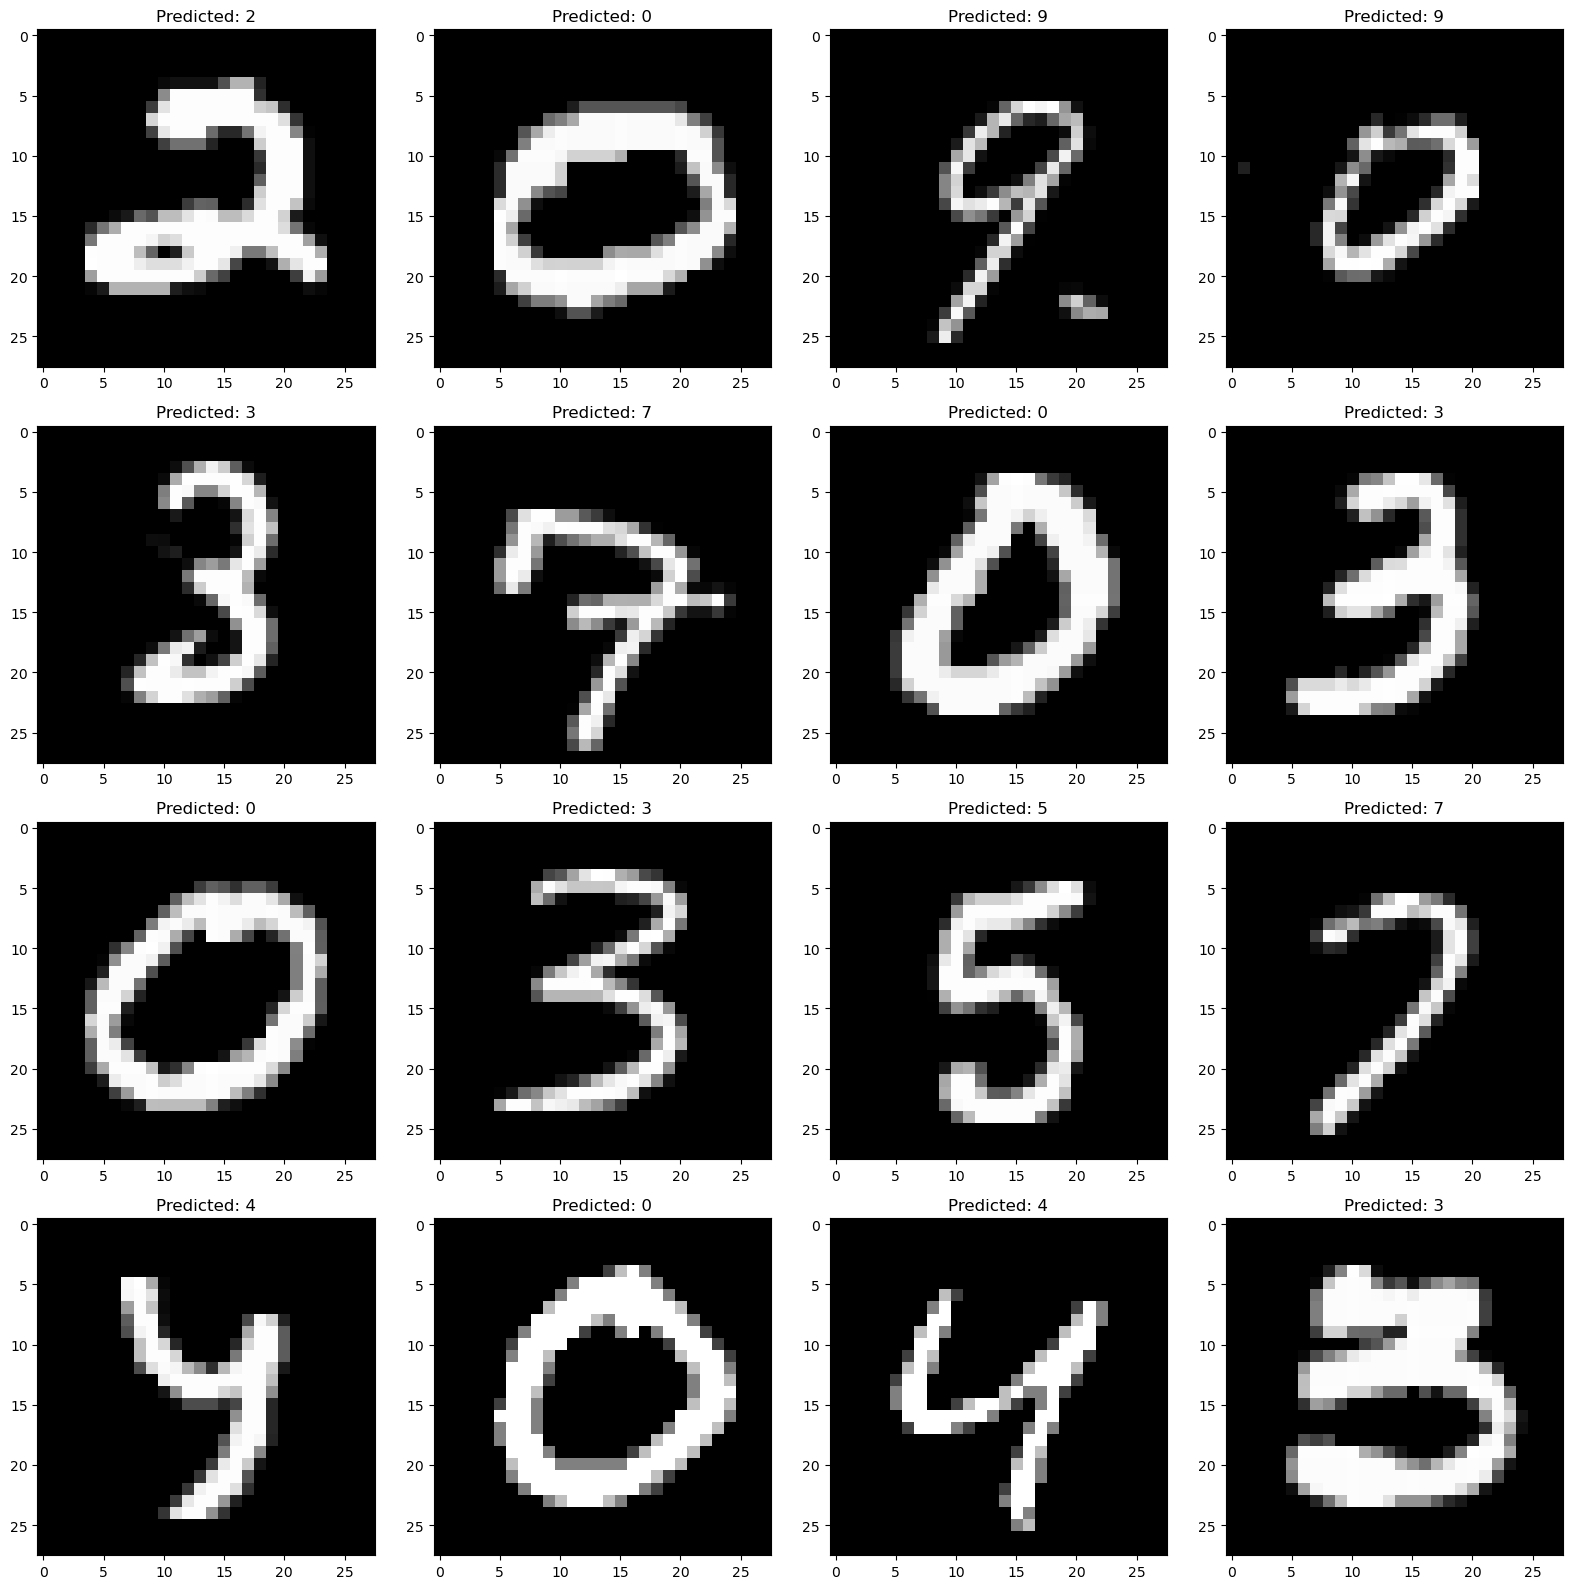

In [17]:
fig = plt.figure(1, figsize=(16, 16))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_df[i], cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions,axis=1)[i]}')

plt.tight_layout()
plt.show

## Submission

In [18]:
pred = pd.DataFrame({'label': np.argmax(predictions,axis=1)})
pred

,label
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [19]:
pred=pd.concat([pd.Series(range(1,28001),name='ImageId'),pred],axis=1)
pred.to_csv('/kaggle/working/submission.csv', index=False)